In [25]:
using LightGraphs, PyPlot
include("sbm.jl")

to_lightgraph (generic function with 1 method)

In [42]:
function return_classtable(fname)
    file = open(fname)
    ground_truth_classes = []
    for line in eachline(file)
        line = split(strip(line)) # removes white space
        if line[1] == "value"
            push!(ground_truth_classes, convert(Int64, parse(Int64, line[2])))
        end
    end
    return ground_truth_classes
end

return_classtable (generic function with 1 method)

In [64]:
FNAME = "../data/polblogs.gml"
println("Loading Political Blog Dataset ....")
original = loadgraph(FNAME, :gml)
true_classes = return_classtable(FNAME)

println("Finding Largest Connected Component")
# ccs = weakly_connected_components(original)
ccs = connected_components(original)
largest_cc = ccs[indmax(map(x->size(x)[1], ccs))]
println("Obtaining Subgraph for Largest Connected Component")
blog_dataset, _ = induced_subgraph(original, largest_cc)
true_classes = true_classes[largest_cc]
blog_dataset = Graph(blog_dataset)
num_blogs = nv(blog_dataset)
true_cluster_sizes_1 = sum(true_classes)
true_cluster_sizes_2 = length(true_classes) - true_cluster_sizes_1
println("Ground Truth: Cluster sizes are $true_cluster_sizes_1 and $true_cluster_sizes_2")
G = blog_dataset;
labels = true_classes;

Loading Political Blog Dataset ....
Finding Largest Connected Component
Obtaining Subgraph for Largest Connected Component
Ground Truth: Cluster sizes are 636 and 586


1222-element Array{Any,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [31]:
# Simulate SBM
labels,edgeSet = gen_sym_sbm(1200, 2, 6.6, 0.7, regime=SBM_LOG)
G, labels = to_lightgraph(labels, edgeSet)


({1200, 15557} undirected graph,[1,1,0,1,0,1,1,0,0,0  …  1,1,0,0,1,1,0,0,1,1])

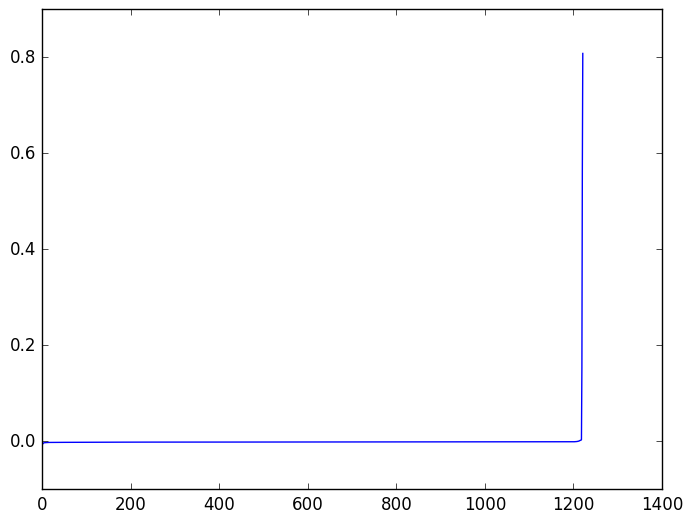

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x323075c10>

In [66]:
e2 = eigvecs(full(laplacian_matrix(G)))[:,3];
plot(sort(e2))

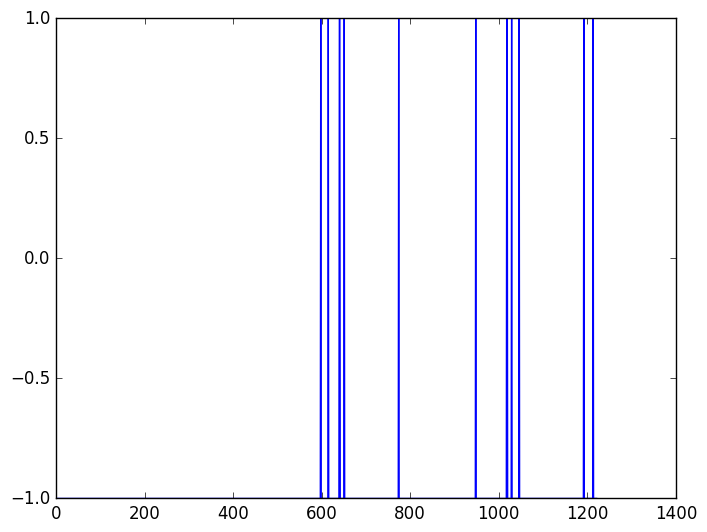

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3231362d0>

In [67]:
label_est = sign(e2);
plot(label_est)


In [68]:
# SBM errors
max(sum(label_est .== labels*2 -1), sum(label_est .!= labels*2 -1))/length(labels)

0.5098199672667758

In [60]:
max(sum(label_est .== labels*2 -1), sum(label_est .!= labels*2 -1))/length(labels)

40_results.txt
Untitled.ipynb
accuracy_45.png
data
helpers.jl
lager_cluster_45.png
larger_cluster_45.png
main.jl
python
results.h5
sbm.jl
small_cluster_45.png
smaller_cluster_45.png
spectral_comm_detect.jl
spectral_graph_methods.ipynb
